<a href="https://colab.research.google.com/github/listarova-aleksandra/2_year_project/blob/main/clients.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_predict, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

In [91]:
df = pd.read_csv("clients.csv")
df.head()

,id,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,satisfaction
0,1,Male,48.0,disloyal Customer,Business travel,Business,821.0,2.0,5.0,3.0,3.0,3.0,3.0,5.0,3.0,5.0,5.0,3.0,2.0,5.0,4.0,5.0,5.0,neutral or dissatisfied
1,2,Female,35.0,Loyal Customer,Business travel,Business,821.0,26.0,39.0,2.0,2.0,2.0,2.0,3.0,5.0,4.0,5.0,5.0,5.0,5.0,3.0,5.0,5.0,satisfied
2,3,Male,41.0,Loyal Customer,Business travel,Business,853.0,0.0,0.0,4.0,4.0,4.0,4.0,5.0,5.0,5.0,3.0,3.0,3.0,3.0,4.0,3.0,5.0,satisfied
3,4,Male,50.0,Loyal Customer,Business travel,Business,1905.0,0.0,0.0,2.0,2.0,2.0,2.0,4.0,4.0,5.0,5.0,5.0,5.0,5.0,3.0,5.0,4.0,satisfied
4,5,Female,49.0,Loyal Customer,Business travel,Business,3470.0,0.0,1.0,3.0,3.0,3.0,3.0,4.0,5.0,4.0,3.0,3.0,4.0,3.0,3.0,3.0,5.0,satisfied


In [92]:
df.drop(columns=["id"], inplace=True)

In [93]:
df.shape

(129880, 23)

In [94]:
df.columns = df.columns.str.lower()

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   gender                             129549 non-null  object 
 1   age                                129564 non-null  float64
 2   customer type                      129803 non-null  object 
 3   type of travel                     129779 non-null  object 
 4   class                              129764 non-null  object 
 5   flight distance                    129786 non-null  float64
 6   departure delay in minutes         129773 non-null  float64
 7   arrival delay in minutes           129371 non-null  float64
 8   inflight wifi service              129835 non-null  float64
 9   departure/arrival time convenient  129831 non-null  float64
 10  ease of online booking             129837 non-null  float64
 11  gate location                      1298

In [96]:
df.describe()

,age,flight distance,departure delay in minutes,arrival delay in minutes,inflight wifi service,departure/arrival time convenient,ease of online booking,gate location,food and drink,online boarding,seat comfort,inflight entertainment,on-board service,leg room service,baggage handling,checkin service,inflight service,cleanliness
count,129564.000000,129786.000000,129773.000000,129371.000000,129835.000000,129831.000000,129837.000000,129842.000000,129830.000000,129834.000000,129832.000000,129833.000000,129836.000000,129834.000000,129832.000000,129838.000000,129817.00000,129843.000000
mean,40.113951,1323.385804,15.811301,16.651406,2.732183,3.061857,2.760523,2.981424,3.208349,3.256674,3.445691,3.361395,3.387181,3.356101,3.636107,3.310056,3.64718,3.289865
std,20.365190,4516.191530,93.206139,109.167328,1.359786,1.559323,1.430800,1.312628,1.357649,1.381889,1.349732,1.366866,1.335540,1.361633,1.221818,1.298626,1.21837,1.347625
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,27.000000,414.000000,0.000000,0.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.00000,2.000000
50%,40.000000,846.000000,0.000000,0.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.00000,3.000000
75%,51.000000,1744.000000,12.000000,13.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.00000,4.000000
max,621.000000,379620.000000,22227.000000,14006.000000,45.000000,45.000000,45.000000,36.000000,45.000000,40.000000,45.000000,45.000000,45.000000,40.000000,40.000000,45.000000,40.00000,45.000000


##Предобработка данных

###Работа с выбросами

**Есть явные выбросы в возрасте пассажиров**

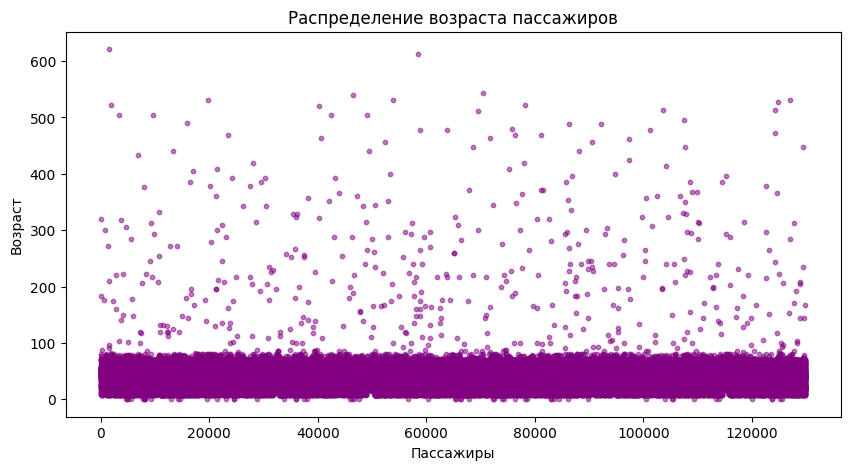

In [97]:
plt.figure(figsize=(10, 5))
plt.scatter(df.index, df['age'], alpha=0.5, color='purple', s=10)
plt.xlabel('Пассажиры')
plt.ylabel('Возраст')
plt.title('Распределение возраста пассажиров')
plt.show()

In [98]:
df[df['age'] > 105]

,gender,age,customer type,type of travel,class,flight distance,departure delay in minutes,arrival delay in minutes,inflight wifi service,departure/arrival time convenient,ease of online booking,gate location,food and drink,online boarding,seat comfort,inflight entertainment,on-board service,leg room service,baggage handling,checkin service,inflight service,cleanliness,satisfaction
28,Male,320.0,Loyal Customer,Business travel,Business,3734.0,0.0,52.0,4.0,4.0,4.0,4.0,2.0,4.0,4.0,5.0,5.0,5.0,5.0,4.0,5.0,3.0,satisfied
74,Female,184.0,disloyal Customer,Business travel,Eco,108.0,0.0,0.0,2.0,5.0,1.0,2.0,2.0,1.0,2.0,2.0,4.0,2.0,4.0,5.0,2.0,2.0,-
595,Female,176.0,Loyal Customer,Business travel,Business,89.0,25.0,23.0,1.0,1.0,1.0,1.0,2.0,4.0,5.0,4.0,4.0,4.0,4.0,4.0,4.0,5.0,-
769,Male,300.0,NaN,Business travel,Business,2883.0,0.0,0.0,1.0,3.0,3.0,3.0,2.0,2.0,3.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,neutral or dissatisfied
1313,Male,272.0,Loyal Customer,Business travel,Business,247.0,0.0,0.0,0.0,0.0,0.0,3.0,4.0,5.0,5.0,3.0,3.0,1.0,1.0,4.0,3.0,5.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128949,Female,144.0,Loyal Customer,Business travel,Business,3984.0,0.0,0.0,1.0,1.0,1.0,1.0,2.0,4.0,4.0,4.0,4.0,4.0,4.0,5.0,4.0,4.0,-
129457,Male,448.0,Loyal Customer,Business travel,Business,2764.0,0.0,0.0,3.0,3.0,3.0,3.0,5.0,4.0,5.0,4.0,4.0,4.0,4.0,3.0,4.0,5.0,satisfied
129518,Female,234.0,disloyal Customer,Business travel,Business,2583.0,0.0,1.0,1.0,3.0,1.0,4.0,3.0,1.0,2.0,3.0,1.0,1.0,2.0,1.0,4.0,3.0,-
129638,Male,144.0,Loyal Customer,Business travel,Business,337.0,0.0,0.0,1.0,1.0,2.0,1.0,5.0,5.0,4.0,5.0,5.0,5.0,5.0,5.0,5.0,3.0,satisfied


In [99]:
df = df[(df['age'] > 0)&(df['age'] <= 105)]

**Сейчас возраст пассажиров адекватный**

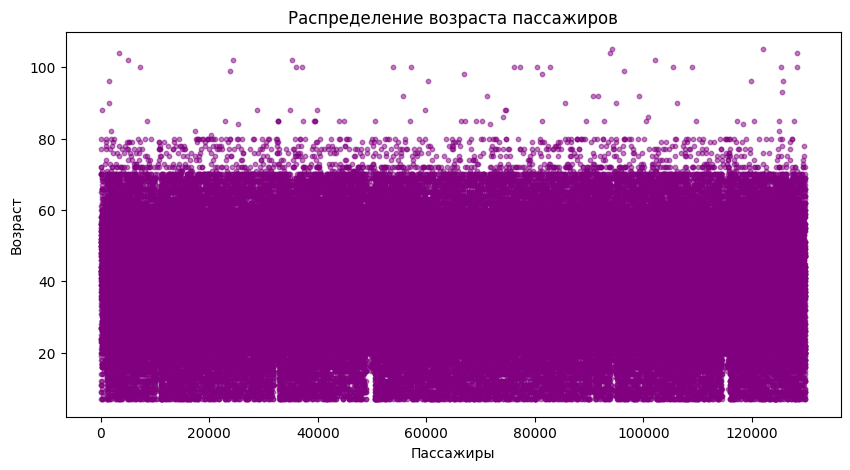

In [100]:
plt.figure(figsize=(10, 5))
plt.scatter(df.index, df['age'], alpha=0.5, color='purple', s=10)
plt.xlabel('Пассажиры')
plt.ylabel('Возраст')
plt.title('Распределение возраста пассажиров')
plt.show()

**Удаление пропусков в target переменной**

In [101]:
df = df[df['satisfaction'] != '-']
df

,gender,age,customer type,type of travel,class,flight distance,departure delay in minutes,arrival delay in minutes,inflight wifi service,departure/arrival time convenient,ease of online booking,gate location,food and drink,online boarding,seat comfort,inflight entertainment,on-board service,leg room service,baggage handling,checkin service,inflight service,cleanliness,satisfaction
0,Male,48.0,disloyal Customer,Business travel,Business,821.0,2.0,5.0,3.0,3.0,3.0,3.0,5.0,3.0,5.0,5.0,3.0,2.0,5.0,4.0,5.0,5.0,neutral or dissatisfied
1,Female,35.0,Loyal Customer,Business travel,Business,821.0,26.0,39.0,2.0,2.0,2.0,2.0,3.0,5.0,4.0,5.0,5.0,5.0,5.0,3.0,5.0,5.0,satisfied
2,Male,41.0,Loyal Customer,Business travel,Business,853.0,0.0,0.0,4.0,4.0,4.0,4.0,5.0,5.0,5.0,3.0,3.0,3.0,3.0,4.0,3.0,5.0,satisfied
3,Male,50.0,Loyal Customer,Business travel,Business,1905.0,0.0,0.0,2.0,2.0,2.0,2.0,4.0,4.0,5.0,5.0,5.0,5.0,5.0,3.0,5.0,4.0,satisfied
4,Female,49.0,Loyal Customer,Business travel,Business,3470.0,0.0,1.0,3.0,3.0,3.0,3.0,4.0,5.0,4.0,3.0,3.0,4.0,3.0,3.0,3.0,5.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129873,Female,28.0,Loyal Customer,Personal Travel,Eco Plus,337.0,0.0,0.0,4.0,2.0,4.0,4.0,3.0,4.0,3.0,3.0,1.0,5.0,3.0,4.0,4.0,3.0,neutral or dissatisfied
129874,Female,55.0,Loyal Customer,Personal Travel,Eco Plus,308.0,0.0,0.0,3.0,4.0,3.0,4.0,2.0,4.0,3.0,4.0,4.0,3.0,4.0,4.0,4.0,4.0,neutral or dissatisfied
129877,Male,42.0,Loyal Customer,Personal Travel,Eco Plus,337.0,6.0,14.0,2.0,5.0,2.0,1.0,3.0,2.0,3.0,3.0,3.0,4.0,5.0,4.0,4.0,3.0,neutral or dissatisfied
129878,Male,50.0,Loyal Customer,Personal Travel,Eco Plus,337.0,31.0,22.0,5.0,4.0,4.0,1.0,3.0,4.0,4.0,3.0,4.0,5.0,5.0,3.0,4.0,3.0,satisfied


In [102]:
df['satisfaction'].value_counts()

,count
satisfaction,
neutral or dissatisfied,58542
satisfied,44744


**Удаление выбросов в признаке flight distance**

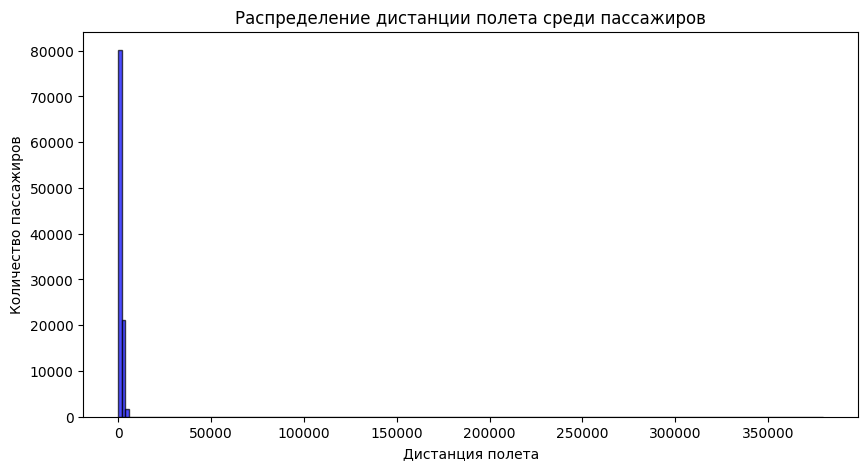

In [103]:
plt.figure(figsize=(10, 5))
plt.hist(df['flight distance'], bins=200, color='blue', edgecolor='black', alpha=0.7)
plt.xlabel('Дистанция полета')
plt.ylabel('Количество пассажиров')
plt.title('Распределение дистанции полета среди пассажиров')
plt.show()

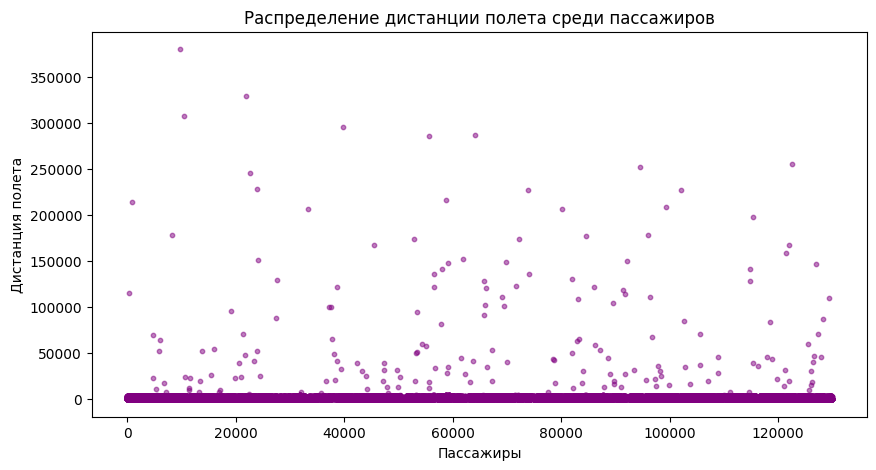

In [104]:
plt.figure(figsize=(10, 5))
plt.scatter(df.index, df['flight distance'], alpha=0.5, color='purple', s=10)
plt.xlabel('Пассажиры')
plt.ylabel('Дистанция полета')
plt.title('Распределение дистанции полета среди пассажиров')
plt.show()

In [105]:
outliers = df[(df["flight distance"] < 5) | (df["flight distance"] > 7000)]
outliers.shape

(185, 23)

In [106]:
df = df[(df["flight distance"] >= 5) & (df["flight distance"] <= 7000)]

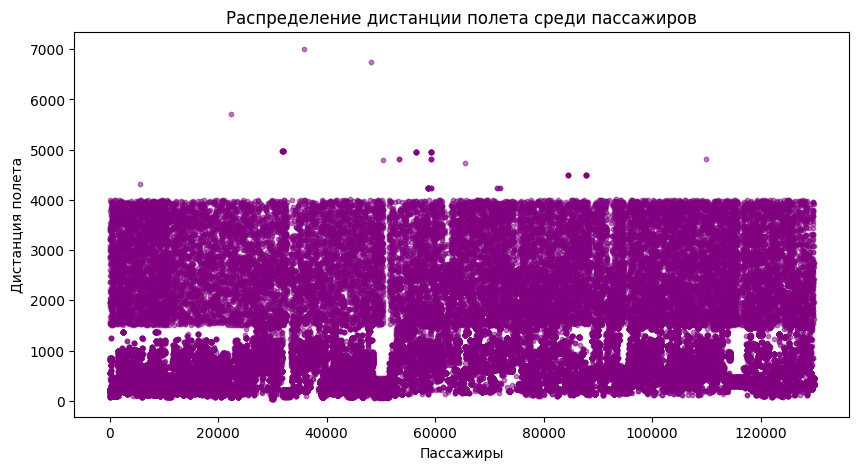

In [107]:
plt.figure(figsize=(10, 5))
plt.scatter(df.index, df['flight distance'], alpha=0.5, color='purple', s=10)
plt.xlabel('Пассажиры')
plt.ylabel('Дистанция полета')
plt.title('Распределение дистанции полета среди пассажиров')
plt.show()

**Работа с выбросами в признаках arrival departure delay in minutes ;delay in minutes**

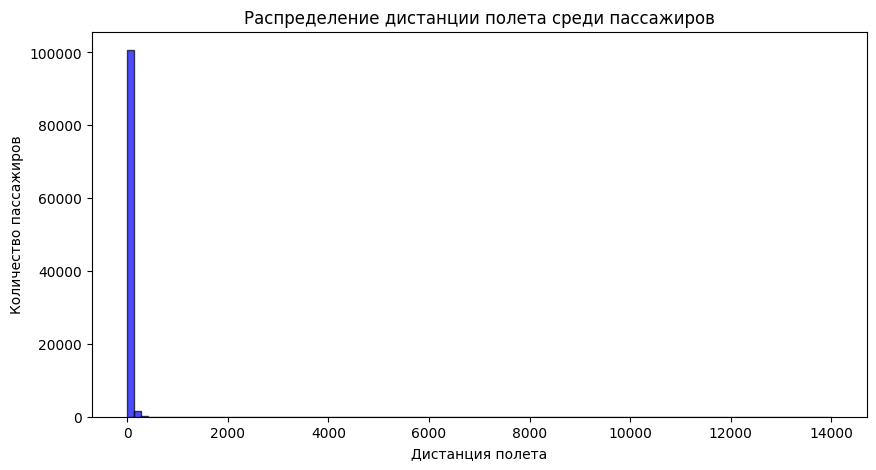

In [108]:
plt.figure(figsize=(10, 5))
plt.hist(df['arrival delay in minutes'], bins=100, color='blue', edgecolor='black', alpha=0.7)
plt.xlabel('Дистанция полета')
plt.ylabel('Количество пассажиров')
plt.title('Распределение дистанции полета среди пассажиров')
plt.show()

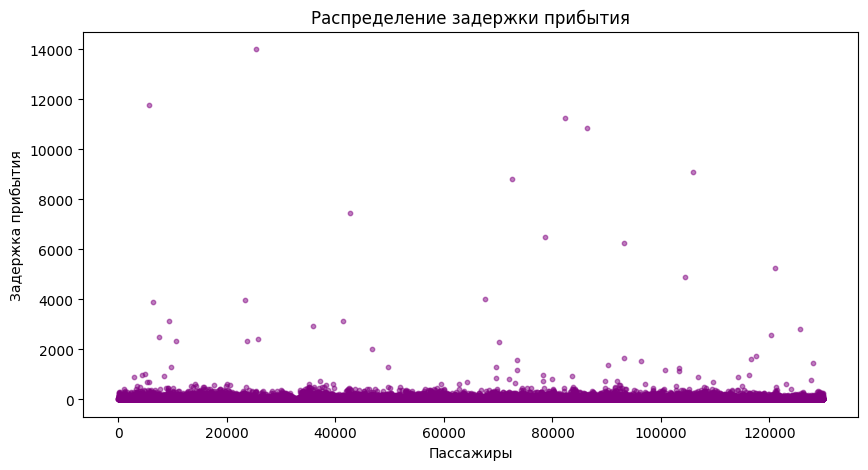

In [109]:
plt.figure(figsize=(10, 5))
plt.scatter(df.index, df['arrival delay in minutes'], alpha=0.5, color='purple', s=10)
plt.xlabel('Пассажиры')
plt.ylabel('Задержка прибытия')
plt.title('Распределение задержки прибытия')
plt.show()

In [110]:
df = df[df['arrival delay in minutes'] < 1000]
df = df[df['departure delay in minutes'] < 1000]

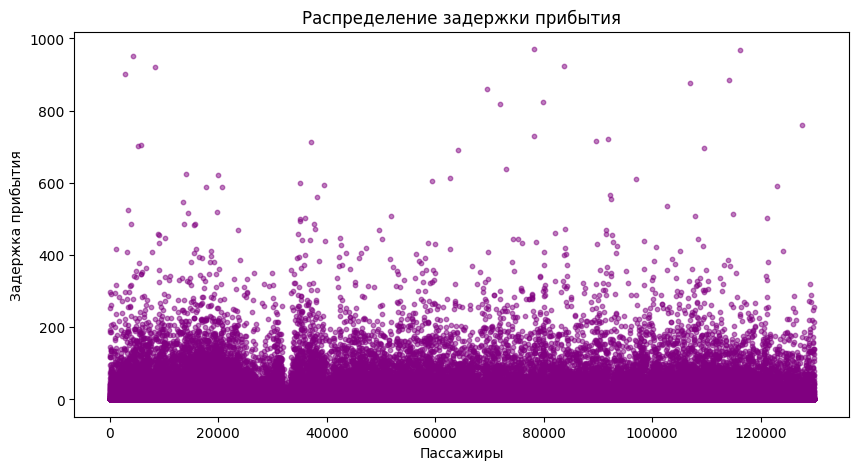

In [111]:
plt.figure(figsize=(10, 5))
plt.scatter(df.index, df['arrival delay in minutes'], alpha=0.5, color='purple', s=10)
plt.xlabel('Пассажиры')
plt.ylabel('Задержка прибытия')
plt.title('Распределение задержки прибытия')
plt.show()

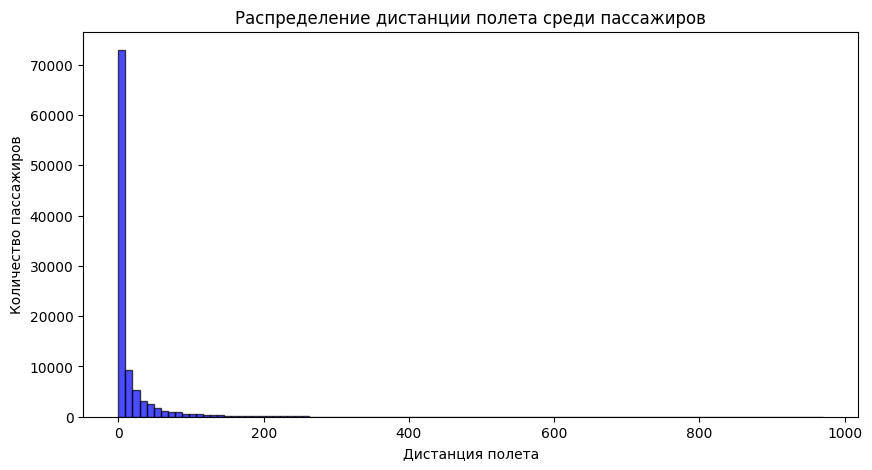

In [112]:
plt.figure(figsize=(10, 5))
plt.hist(df['arrival delay in minutes'], bins=100, color='blue', edgecolor='black', alpha=0.7)
plt.xlabel('Дистанция полета')
plt.ylabel('Количество пассажиров')
plt.title('Распределение дистанции полета среди пассажиров')
plt.show()

**Чистка категориальных признаков**

In [113]:
pd.set_option('display.max_columns', None)

In [114]:
df[df['departure/arrival time convenient'] > 5]

,gender,age,customer type,type of travel,class,flight distance,departure delay in minutes,arrival delay in minutes,inflight wifi service,departure/arrival time convenient,ease of online booking,gate location,food and drink,online boarding,seat comfort,inflight entertainment,on-board service,leg room service,baggage handling,checkin service,inflight service,cleanliness,satisfaction
2581,Female,22.0,Loyal Customer,Business travel,Business,3006.0,13.0,36.0,2.0,14.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,3.0,4.0,3.0,3.0,2.0,neutral or dissatisfied
2763,Male,39.0,disloyal Customer,Business travel,Business,764.0,10.0,0.0,4.0,6.0,3.0,2.0,4.0,3.0,1.0,4.0,5.0,3.0,4.0,4.0,4.0,4.0,satisfied
9359,Female,44.0,Loyal Customer,Business travel,Eco,441.0,0.0,0.0,3.0,7.0,1.0,1.0,5.0,2.0,3.0,3.0,3.0,3.0,3.0,2.0,3.0,4.0,neutral or dissatisfied
10103,Male,57.0,Loyal Customer,Personal Travel,Eco,1195.0,89.0,85.0,2.0,30.0,2.0,1.0,3.0,2.0,3.0,3.0,5.0,4.0,4.0,4.0,4.0,3.0,neutral or dissatisfied
15523,Female,20.0,disloyal Customer,Business travel,Eco,164.0,0.0,3.0,2.0,6.0,2.0,3.0,1.0,2.0,1.0,1.0,4.0,3.0,3.0,1.0,3.0,1.0,neutral or dissatisfied
16103,Female,68.0,Loyal Customer,Personal Travel,Eco,303.0,5.0,18.0,3.0,35.0,3.0,3.0,3.0,4.0,4.0,5.0,5.0,3.0,5.0,5.0,5.0,4.0,neutral or dissatisfied
16767,Female,56.0,Loyal Customer,Business travel,Eco,642.0,0.0,0.0,3.0,20.0,5.0,5.0,5.0,4.0,4.0,2.0,2.0,3.0,2.0,3.0,2.0,3.0,neutral or dissatisfied
23386,Female,24.0,disloyal Customer,Business travel,Eco,300.0,0.0,0.0,4.0,12.0,4.0,3.0,4.0,4.0,4.0,4.0,3.0,4.0,3.0,1.0,5.0,4.0,neutral or dissatisfied
24170,Male,42.0,Loyal Customer,Business travel,Eco,134.0,143.0,159.0,2.0,16.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,4.0,3.0,2.0,1.0,2.0,neutral or dissatisfied
27056,Male,29.0,Loyal Customer,Personal Travel,Eco,1709.0,45.0,28.0,2.0,8.0,2.0,2.0,2.0,2.0,2.0,2.0,4.0,1.0,5.0,4.0,3.0,2.0,neutral or dissatisfied


In [115]:
exclude_columns = ['gender', 'age', 'customer type', 'type of travel', 'class', 'flight distance', 'departure delay in minutes', 'arrival delay in minutes', 'satisfaction']
service_columns = [column for column in df.columns if column not in exclude_columns]
df = df[(df[service_columns] >= 1).all(axis = 1) & (df[service_columns] <= 5).all(axis = 1)]
df

,gender,age,customer type,type of travel,class,flight distance,departure delay in minutes,arrival delay in minutes,inflight wifi service,departure/arrival time convenient,ease of online booking,gate location,food and drink,online boarding,seat comfort,inflight entertainment,on-board service,leg room service,baggage handling,checkin service,inflight service,cleanliness,satisfaction
0,Male,48.0,disloyal Customer,Business travel,Business,821.0,2.0,5.0,3.0,3.0,3.0,3.0,5.0,3.0,5.0,5.0,3.0,2.0,5.0,4.0,5.0,5.0,neutral or dissatisfied
1,Female,35.0,Loyal Customer,Business travel,Business,821.0,26.0,39.0,2.0,2.0,2.0,2.0,3.0,5.0,4.0,5.0,5.0,5.0,5.0,3.0,5.0,5.0,satisfied
2,Male,41.0,Loyal Customer,Business travel,Business,853.0,0.0,0.0,4.0,4.0,4.0,4.0,5.0,5.0,5.0,3.0,3.0,3.0,3.0,4.0,3.0,5.0,satisfied
3,Male,50.0,Loyal Customer,Business travel,Business,1905.0,0.0,0.0,2.0,2.0,2.0,2.0,4.0,4.0,5.0,5.0,5.0,5.0,5.0,3.0,5.0,4.0,satisfied
4,Female,49.0,Loyal Customer,Business travel,Business,3470.0,0.0,1.0,3.0,3.0,3.0,3.0,4.0,5.0,4.0,3.0,3.0,4.0,3.0,3.0,3.0,5.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129873,Female,28.0,Loyal Customer,Personal Travel,Eco Plus,337.0,0.0,0.0,4.0,2.0,4.0,4.0,3.0,4.0,3.0,3.0,1.0,5.0,3.0,4.0,4.0,3.0,neutral or dissatisfied
129874,Female,55.0,Loyal Customer,Personal Travel,Eco Plus,308.0,0.0,0.0,3.0,4.0,3.0,4.0,2.0,4.0,3.0,4.0,4.0,3.0,4.0,4.0,4.0,4.0,neutral or dissatisfied
129877,Male,42.0,Loyal Customer,Personal Travel,Eco Plus,337.0,6.0,14.0,2.0,5.0,2.0,1.0,3.0,2.0,3.0,3.0,3.0,4.0,5.0,4.0,4.0,3.0,neutral or dissatisfied
129878,Male,50.0,Loyal Customer,Personal Travel,Eco Plus,337.0,31.0,22.0,5.0,4.0,4.0,1.0,3.0,4.0,4.0,3.0,4.0,5.0,5.0,3.0,4.0,3.0,satisfied


In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 93518 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             93286 non-null  object 
 1   age                                93518 non-null  float64
 2   customer type                      93460 non-null  object 
 3   type of travel                     93440 non-null  object 
 4   class                              93436 non-null  object 
 5   flight distance                    93518 non-null  float64
 6   departure delay in minutes         93518 non-null  float64
 7   arrival delay in minutes           93518 non-null  float64
 8   inflight wifi service              93518 non-null  float64
 9   departure/arrival time convenient  93518 non-null  float64
 10  ease of online booking             93518 non-null  float64
 11  gate location                      93518 non-null  float64

In [117]:
df.describe()

,age,flight distance,departure delay in minutes,arrival delay in minutes,inflight wifi service,departure/arrival time convenient,ease of online booking,gate location,food and drink,online boarding,seat comfort,inflight entertainment,on-board service,leg room service,baggage handling,checkin service,inflight service,cleanliness
count,93518.000000,93518.000000,93518.000000,93518.000000,93518.000000,93518.000000,93518.000000,93518.000000,93518.000000,93518.000000,93518.000000,93518.000000,93518.000000,93518.000000,93518.000000,93518.000000,93518.000000,93518.000000
mean,39.840266,1222.361823,15.014104,15.427212,2.817907,3.207832,2.878120,2.986462,3.211820,3.325852,3.454180,3.381435,3.385049,3.380248,3.636498,3.291120,3.645191,3.293313
std,15.083444,1000.002927,38.795169,39.293466,1.252529,1.385764,1.296718,1.280980,1.323927,1.263144,1.311284,1.325702,1.286423,1.294810,1.169185,1.265773,1.164387,1.308995
min,7.000000,31.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,28.000000,438.000000,0.000000,0.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000
50%,40.000000,867.000000,0.000000,0.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000
75%,51.000000,1773.000000,13.000000,13.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000
max,105.000000,5712.000000,978.000000,970.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


**Обработка пропусков в признаке gender**

In [118]:
df['gender'].isna().sum()

np.int64(232)

**Это менее 1% данных, поэтому можно будет удалить сттроки с этими пропусками.**

In [119]:
df = df.dropna(subset = ['gender', 'customer type', 'type of travel', 'class'])

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 93068 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             93068 non-null  object 
 1   age                                93068 non-null  float64
 2   customer type                      93068 non-null  object 
 3   type of travel                     93068 non-null  object 
 4   class                              93068 non-null  object 
 5   flight distance                    93068 non-null  float64
 6   departure delay in minutes         93068 non-null  float64
 7   arrival delay in minutes           93068 non-null  float64
 8   inflight wifi service              93068 non-null  float64
 9   departure/arrival time convenient  93068 non-null  float64
 10  ease of online booking             93068 non-null  float64
 11  gate location                      93068 non-null  float64

###Преобразование категориальных перменных

In [121]:
label_columns = ['gender', 'customer type', 'class', 'type of travel', 'satisfaction']
label_enc = LabelEncoder()

for column in label_columns:
    df[column] = label_enc.fit_transform(df[column])

<ipython-input-121-a79c0d52725b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = label_enc.fit_transform(df[column])
<ipython-input-121-a79c0d52725b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = label_enc.fit_transform(df[column])
<ipython-input-121-a79c0d52725b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/p

###Дисбаланс классов

In [122]:
df['satisfaction'].value_counts()

,count
satisfaction,
0,53467
1,39601


In [123]:
df_major = df[df['satisfaction'] == 0]
df_minor = df[df['satisfaction'] == 1]

df_major_downsample = resample(df_major, replace=True, n_samples=len(df_minor), random_state=22)
df = pd.concat([df_major_downsample, df_minor])

In [124]:
df['satisfaction'].value_counts()

,count
satisfaction,
0,39601
1,39601


In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 79202 entries, 106769 to 129878
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             79202 non-null  int64  
 1   age                                79202 non-null  float64
 2   customer type                      79202 non-null  int64  
 3   type of travel                     79202 non-null  int64  
 4   class                              79202 non-null  int64  
 5   flight distance                    79202 non-null  float64
 6   departure delay in minutes         79202 non-null  float64
 7   arrival delay in minutes           79202 non-null  float64
 8   inflight wifi service              79202 non-null  float64
 9   departure/arrival time convenient  79202 non-null  float64
 10  ease of online booking             79202 non-null  float64
 11  gate location                      79202 non-null  fl

###Масшатибирование числовых признаков

In [126]:
df_scaled = df.copy()
scaled_exclude_columns = ['gender', 'customer type', 'type of travel', 'class', 'satisfaction']
scaled_numeric_columns = [column for column in df.columns if column not in scaled_exclude_columns]
scaler = StandardScaler()
df_scaled[scaled_numeric_columns] = scaler.fit_transform(df_scaled[scaled_numeric_columns])

In [127]:
df_scaled.head(5)

,gender,age,customer type,type of travel,class,flight distance,departure delay in minutes,arrival delay in minutes,inflight wifi service,departure/arrival time convenient,ease of online booking,gate location,food and drink,online boarding,seat comfort,inflight entertainment,on-board service,leg room service,baggage handling,checkin service,inflight service,cleanliness,satisfaction
106769,1,1.341737,0,1,1,-0.428361,0.589692,0.261966,-0.695042,0.576954,-0.705407,1.547792,-0.189659,-1.140538,-0.403639,-0.355365,1.214777,-1.132915,0.269629,0.526254,0.265414,-0.270077,0
71651,0,1.002504,0,1,1,-0.068916,0.032896,-0.028302,0.083263,-1.580616,0.054859,0.002741,1.327806,-1.140538,0.364146,-0.355365,-0.356557,-0.353448,-0.590704,-1.859616,-0.599269,-1.039275,0
77075,1,1.341737,0,0,0,0.941044,-0.391330,-0.344958,-0.695042,-0.861426,-0.705407,-0.769785,-0.948392,0.448026,0.364146,-1.118367,-1.142224,-1.132915,-1.451036,-1.859616,-1.463953,0.499121,0
60536,1,0.391884,0,1,1,-0.611990,-0.391330,-0.397734,0.861567,0.576954,0.815125,0.002741,-0.948392,0.448026,-1.939208,-1.118367,1.214777,-0.353448,1.129962,1.321544,1.130097,-1.039275,0
56070,0,-0.015196,0,1,1,1.287791,-0.391330,-0.397734,-1.473347,-0.142236,-1.465673,0.002741,-1.707124,-0.346256,-0.403639,-1.881370,-1.927890,-1.132915,-1.451036,-0.269036,-0.599269,-0.270077,0


##Разделение данных

**Для немасштабированных данных**

In [128]:
x = df.drop(columns=['satisfaction'])
y = df['satisfaction']

x_train_val, x_test, y_train_val, y_test = train_test_split(x, y, test_size=0.2, random_state=22)
print(f"train+validation: {x_train_val.shape[0]} строк")
print(f"test: {x_test.shape[0]} строк")

train+validation: 63361 строк
test: 15841 строк


**Для масшатированных данных**

In [129]:
x_scaled = df_scaled.drop(columns=['satisfaction'])
y_scaled = df_scaled['satisfaction']

x_scaled_train_val, x_scaled_test, y_scaled_train_val, y_scaled_test = train_test_split(x_scaled, y_scaled, test_size=0.2, random_state=22)
print(f"train+validation: {x_scaled_train_val.shape[0]} строк")
print(f"test: {x_scaled_test.shape[0]} строк")

train+validation: 63361 строк
test: 15841 строк


#Ml модели

###Random Forest

**Кросс - валидация, метрики, обучение модели**

In [130]:
def metrics(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    print("Оценка модели:")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1-score: {f1}")

In [131]:
kv = StratifiedKFold(n_splits=5, shuffle=True, random_state=22)
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=22)
y_train_val_pred = cross_val_predict(random_forest_model, x_train_val, y_train_val, cv=kv)
print('Оценка модели на кросс-валидации')
metrics(y_train_val, y_train_val_pred)
random_forest_model.fit(x_train_val, y_train_val)
y_test_pred = random_forest_model.predict(x_test)
print("Финальная оценка модели на отложенной тестовой выборке")
metrics(y_test, y_test_pred)

Оценка модели на кросс-валидации
Оценка модели:
Accuracy: 0.963273938226985
Precision: 0.9757685704104442
Recall: 0.9501892744479495
F1-score: 0.9628090587990858
Финальная оценка модели на отложенной тестовой выборке
Оценка модели:
Accuracy: 0.96155545735749
Precision: 0.9753585397653194
Recall: 0.9468421718769776
F1-score: 0.9608888318027101


In [136]:
param_grid = {
    'n_estimators': [50, 70, 100],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

kv = StratifiedKFold(n_splits=5, shuffle=True, random_state=22)
random_forest = RandomForestClassifier(random_state=22)

grid_search = GridSearchCV(
    estimator=random_forest,
    param_grid=param_grid,
    cv=kv,
    scoring='f1',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(x_train_val, y_train_val)
print("Лучшие параметры:", grid_search.best_params_)

best_random_forest_model = grid_search.best_estimator_
y_train_val_pred = cross_val_predict(best_random_forest_model, x_train_val, y_train_val, cv=kv)
print("Оценка модели на кросс-валидации")
metrics(y_train_val, y_train_val_pred)

best_random_forest_model.fit(x_train_val, y_train_val)
y_test_pred = best_random_forest_model.predict(x_test)
print("Финальная оценка модели на отложенной тестовой выборке")
metrics(y_test, y_test_pred)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Лучшие параметры: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 70}
Оценка модели на кросс-валидации
Оценка модели:
Accuracy: 0.963273938226985
Precision: 0.9757377474004729
Recall: 0.9502208201892745
F1-score: 0.9628102475587732
Финальная оценка модели на отложенной тестовой выборке
Оценка модели:
Accuracy: 0.9614923300296698
Precision: 0.9748599713429725
Recall: 0.9472218706492849
F1-score: 0.9608422133778406
